# 1. Linear Regression
### 공부 시간에 따른 시험 점수


In [2]:
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
cd /Users/oeoi/Desktop/PythonMLWorkspace(LightWeight)/ScikitLearn

/Users/oeoi/Desktop/PythonMLWorkspace(LightWeight)/ScikitLearn


In [4]:
dataset = pd.read_csv('LinearRegressionData.csv')

In [5]:
dataset.head()

,hour,score
0,0.5,10
1,1.2,8
2,1.8,14
3,2.4,26
4,2.6,22


In [6]:
X = dataset.iloc[:, 0].values  # or [:, :-1]
y = dataset.iloc[:, -1].values


In [7]:
X = X.reshape(-1,1)

In [8]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()    #객체 생성
reg.fit(X, y)   # 학습 (모델 생성)

LinearRegression()

In [9]:
y_pred = reg.predict(X) # X에 대한 예측 값
y_pred

array([  5.00336377,  12.31395163,  18.58016979,  24.84638795,
        26.93512734,  33.20134551,  40.51193337,  45.73378184,
        46.77815153,  52.        ,  55.13310908,  60.35495755,
        62.44369694,  63.48806663,  64.53243633,  71.84302419,
        74.97613327,  87.5085696 ,  89.59730899, 104.2184847 ])

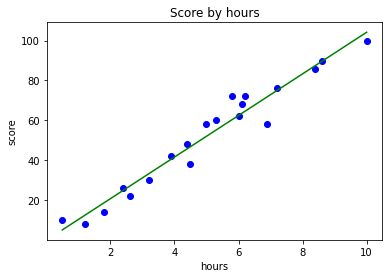

In [10]:
plt.scatter(X, y, color="blue")
plt.plot(X, y_pred, color="green")
plt.title("Score by hours")
plt.xlabel("hours")
plt.ylabel("score")
plt.show()

In [13]:
print("9시간 공부 했을 때  예상 점수 : ", reg.predict([[9], [8], [7]]))
# predict 부분에 2차원 배열을 넣어야함


9시간 공부 했을 때  예상 점수 :  [93.77478776 83.33109082 72.88739388]


In [14]:
reg.coef_

array([10.44369694])

In [15]:
reg.intercept_

-0.218484702867201

### 데이터 세트 분리

In [16]:
import matplotlib.pyplot as plt
import pandas as pd

In [17]:
dataset = pd.read_csv('LinearRegressionData.csv')

In [18]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

In [30]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 0)

In [21]:
 X, len(X)

(array([[ 0.5],
        [ 1.2],
        [ 1.8],
        [ 2.4],
        [ 2.6],
        [ 3.2],
        [ 3.9],
        [ 4.4],
        [ 4.5],
        [ 5. ],
        [ 5.3],
        [ 5.8],
        [ 6. ],
        [ 6.1],
        [ 6.2],
        [ 6.9],
        [ 7.2],
        [ 8.4],
        [ 8.6],
        [10. ]]),
 20)

In [22]:
X_train, len(X_train)

(array([[5.3],
        [8.4],
        [3.9],
        [6.1],
        [2.6],
        [1.8],
        [3.2],
        [6.2],
        [5. ],
        [4.4],
        [7.2],
        [5.8],
        [2.4],
        [0.5],
        [6.9],
        [6. ]]),
 16)

In [23]:
X_test, len(X_test)

(array([[ 8.6],
        [ 1.2],
        [10. ],
        [ 4.5]]),
 4)

### 분리된 데이터를 통한 모델링

In [24]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()



In [25]:
reg.fit(X_train, y_train)

LinearRegression()

### 데이터 시각화 (훈련 세트)

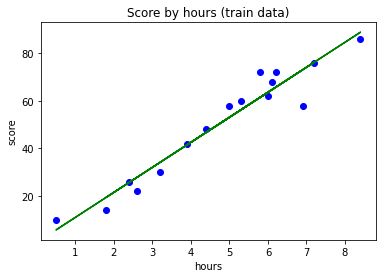

In [28]:
plt.scatter(X_train, y_train, color="blue")
plt.plot(X_train, reg.predict(X_train), color="green")
plt.title("Score by hours (train data)")
plt.xlabel("hours")
plt.ylabel("score")
plt.show()

### 데이터 시각화 (테스트 세트)

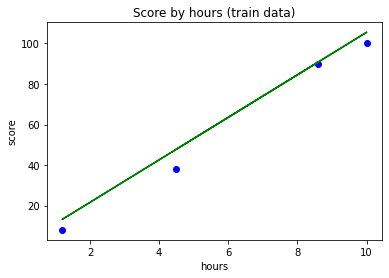

In [31]:
plt.scatter(X_test, y_test, color="blue")
plt.plot(X_test, reg.predict(X_test), color="green")
plt.title("Score by hours (train data)")
plt.xlabel("hours")
plt.ylabel("score")
plt.show()

In [32]:
reg.coef_

array([10.49161294])

In [33]:
reg.intercept_

0.6115562905169796

### 모델 평가

In [34]:
reg.score(X_test, y_test)

0.9727616474310156

In [35]:
reg.score(X_train, y_train)

0.9356663661221668

### 경사 하강법 (Gradient Descent)

In [45]:
from sklearn.linear_model import SGDRegressor   # SGD : Stochastic Gradient Descent 확률적 경사 하강법
sr = SGDRegressor(max_iter = 1000, eta0=0.001, random_state=0, verbose=1)
sr.fit(X_train, y_train)
# eta0 은 learning rate 학습률을 의미함, 학습률이란 기울기에 곱해지는 값으로 얼마나 기울기를 반영할 건지 정하는 것.
# 학습률이 너무 크면 최저점에 수렴하지 못하고, 너무 작으면 학습 시간이 매우 오래걸리며, 최저점에 도달하지 못함


-- Epoch 1
Norm: 2.40, NNZs: 1, Bias: 0.442470, T: 16, Avg. loss: 1181.034371
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 3.84, NNZs: 1, Bias: 0.697455, T: 32, Avg. loss: 754.011321
Total training time: 0.00 seconds.
-- Epoch 3
Norm: 4.89, NNZs: 1, Bias: 0.881472, T: 48, Avg. loss: 520.842928
Total training time: 0.00 seconds.
-- Epoch 4
Norm: 5.70, NNZs: 1, Bias: 1.023556, T: 64, Avg. loss: 374.527388
Total training time: 0.00 seconds.
-- Epoch 5
Norm: 6.34, NNZs: 1, Bias: 1.137258, T: 80, Avg. loss: 277.717040
Total training time: 0.00 seconds.
-- Epoch 6
Norm: 6.88, NNZs: 1, Bias: 1.230635, T: 96, Avg. loss: 210.603548
Total training time: 0.00 seconds.
-- Epoch 7
Norm: 7.32, NNZs: 1, Bias: 1.308149, T: 112, Avg. loss: 162.433366
Total training time: 0.00 seconds.
-- Epoch 8
Norm: 7.69, NNZs: 1, Bias: 1.372847, T: 128, Avg. loss: 127.468199
Total training time: 0.00 seconds.
-- Epoch 9
Norm: 8.01, NNZs: 1, Bias: 1.427757, T: 144, Avg. loss: 101.814505
Total training time: 0.

SGDRegressor(eta0=0.001, random_state=0, verbose=1)

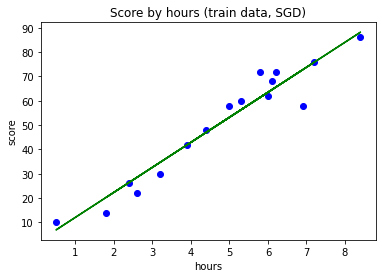

In [46]:
plt.scatter(X_train, y_train, color="blue")
plt.plot(X_train, sr.predict(X_train), color="green")
plt.title("Score by hours (train data, SGD)")
plt.xlabel("hours")
plt.ylabel("score")
plt.show()

In [40]:
sr.score(X_test, y_test)

0.9727257150300063

In [42]:
sr.score(X_train, y_train)

0.9352879542873527